<a href="https://colab.research.google.com/github/mcnica89/MATH4060/blob/main/Week_6C_Live_Coding_SARSA_on_Gamblers_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def plot_value_function_and_actions(v_star, a_star):
  #Purpose:
  #  Plot v_star and a_star for the Gambler's problem
  #Output:
  #  A plot of the simple random walks 


  fig, ax = plt.subplots()  # Create a figure containing a single axes.
  ax.axhline(0,color='black',linestyle='dashed')
  ax.axhline(1,color='black',linestyle='dashed')
  ax.set_title("Value function")
  ax.set_xlabel("State ($)")
  ax.set_ylabel("Value (Probability to win)")

  #ax.set(ylim=(-2*math.sqrt(N_steps),2*math.sqrt(N_steps)))

  #print("Generating random walks....")
  #random_walks = generate_simple_random_walk(random_key,N_steps,N_samples)
  #print("Plotting random walks....")
  ax.plot(v_star,linewidth=2, alpha=0.75, color='blue')  # Plot some data on the axes.
  
  fig2, ax2 = plt.subplots()  # Create a figure containing a single axes.
  ax2.set_title("Optimal bet")
  ax2.set_xlabel("State ($)")
  ax2.set_ylabel("Size of the optimal bet")


  ax2.plot(a_star,linewidth=2, alpha=0.75, color='red')  # Plot some data on the axes.

  plt.show()

In [23]:
def gamblers_problem_nextstate(p_win, current_state, action):
  '''Returns the next state (its random!) given the current_state and action you chose'''

  #p_win is a secret number (unknown to the SARSA user) that is your probability to win
  win = (random.random() < p_win)
  if win == True:
    return current_state + action
  else:
    return current_state - action 


In [37]:
def gamblers_problem_epsilon_greedy(s, q, epsilon, N_target):
  '''Return the action dertermined from the q function from current_state using the epsilon-greedy algorthm'''
  #This sis the line from the pseudocode that says "Choose A from S using policy derived from Q (e.g. epsilond greedy)"

  probability_epsilon_event = (random.random() < epsilon)
  
  max_bet =  min(s,N_target-s)

  if s == 0 or s==N_target:
    return 1 #Handles the corner case when max_bet would be 0

  if probability_epsilon_event == True:  
    return random.randint(1,max_bet) #Purely random
  else:
    return np.argmax(q[s,0:max_bet+1]) #Purely greedy

In [93]:
def gamblers_problem(p_heads, N_target, num_episodes=10):
  '''Return the optimal value function and optimal policy for Gamblers problem using SARSA'''
  #Note: p_heads is a secret! Not allowed to know the value of p_heads!!!!!
  #q_star = np.random.rand(N_target+1,N_target)
  q_star = np.zeros((N_target+1,N_target))
  for s in range(N_target+1):
    for a in range(N_target):
      if a <= min(s,N_target-s):
        q_star[s,a] = 0.5
  
  #q_star(s,a) is the value function if you play action a from state s
  # and then play optimally afterwards
  # The s-th, a-th entry of q_star represents q_star(s,a)
  # Be careful! q_star(s,a) only makes sense if a is less than max_bet at s
  # Max_bet(s) = min(s,N_target-s)

  #Hardcode the fact that the reward at N_target is 1
  q_star[N_target,:] = 1
  q_star[0,:] = 0

  for episode in range(num_episodes):
    if episode % int(num_episodes/10) == 0:
      print("Iteration number: ", episode)
    epsilon = 10/np.sqrt(episode+1)
    learning_rate = 1/np.sqrt(episode+1)
    current_state = random.randint(1,N_target-1)

    while current_state > 0 and current_state < N_target:
      current_action = gamblers_problem_epsilon_greedy(current_state, q_star, epsilon, N_target)
      new_state = gamblers_problem_nextstate(p_heads, current_state, current_action)
      reward = 0 #The reward is always 0 in the Gambler's problem except for the terminal state at N_target
      new_action = gamblers_problem_epsilon_greedy(new_state, q_star, epsilon, N_target)

      q_star[current_state,current_action] += learning_rate*(q_star[new_state,new_action] - q_star[current_state,current_action])

      current_state = new_state

  v_star = np.max(q_star,axis=1)
  a_star = np.argmax(q_star,axis=1)
  plot_value_function_and_actions(v_star,a_star)
  return v_star, a_star

Iteration number:  0
Iteration number:  40000
Iteration number:  80000
Iteration number:  120000
Iteration number:  160000
Iteration number:  200000
Iteration number:  240000
Iteration number:  280000
Iteration number:  320000
Iteration number:  360000


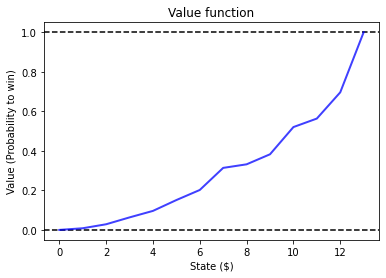

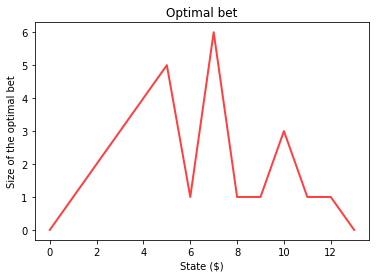

(array([0.        , 0.00844289, 0.02859009, 0.06332269, 0.09621636,
        0.15104401, 0.20203389, 0.31380022, 0.33183163, 0.38261017,
        0.52030108, 0.56329106, 0.69601048, 1.        ]),
 array([0, 1, 2, 3, 4, 5, 1, 6, 1, 1, 3, 1, 1, 0]))

In [94]:
gamblers_problem(0.3, 13, 400000)

In [14]:
random.random()

0.17161450402322298